In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
! ls ../csv/error_over_p

0_D512_reps1000.csv	     D128_reps1000.csv	D64_reps100.csv
45_D512_reps1000.csv	     D128_reps100.csv	ones_D512_reps1000.csv
abs_randn_D512_reps1000.csv  D5000_reps100.csv	randn_D512_reps1000.csv


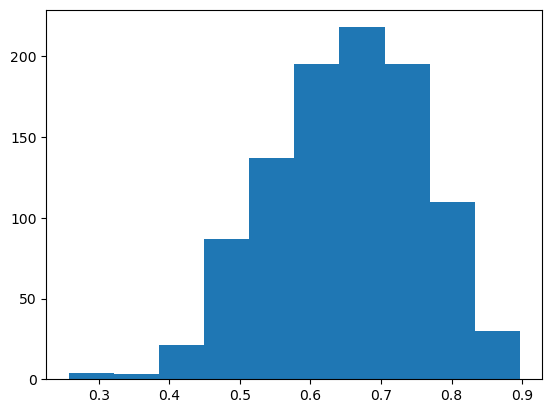

In [44]:
d = 16

x = np.abs(np.random.randn(1000, d))
y = np.abs(np.random.randn(1000, d))
# x = np.random.randn(1000, 10)
# y = np.random.randn(1000, 10)

x /= np.linalg.norm(x, axis=-1, keepdims=True)
y /= np.linalg.norm(y, axis=-1, keepdims=True)

xTy = (x * y).sum(axis=-1)
plt.hist(xTy)
plt.show()

In [33]:
np.pi / 4 # 45 degrees

0.7853981633974483

In [37]:
df = pd.read_csv('../csv/error_over_p/abs_randn_d2_D1024_reps1000.csv')

In [38]:
df.loc[df['name']=='Gaussian']

,name,p,proj,full_cov,complex_weights,complex_real,ahle,tree,mae,mse,abs_err_std,abs_sq_err_std
0,Gaussian,1,gaussian,False,False,False,False,False,0.032415,0.001664,0.024760,0.002401
1,Gaussian,2,gaussian,False,False,False,False,False,0.057600,0.005534,0.047073,0.009089
2,Gaussian,3,gaussian,False,False,False,False,False,0.088892,0.014405,0.080645,0.030711
3,Gaussian,4,gaussian,False,False,False,False,False,0.130636,0.038746,0.147244,0.149772
4,Gaussian,5,gaussian,False,False,False,False,False,0.180507,0.092247,0.244264,0.772774
5,Gaussian,6,gaussian,False,False,False,False,False,0.232138,0.209919,0.395008,2.241052
6,Gaussian,7,gaussian,False,False,False,False,False,0.285647,0.474591,0.626895,6.445160
7,Gaussian,8,gaussian,False,False,False,False,False,0.378468,3.217145,1.753257,107.541893
8,Gaussian,9,gaussian,False,False,False,False,False,0.371766,2.047087,1.381622,112.131638


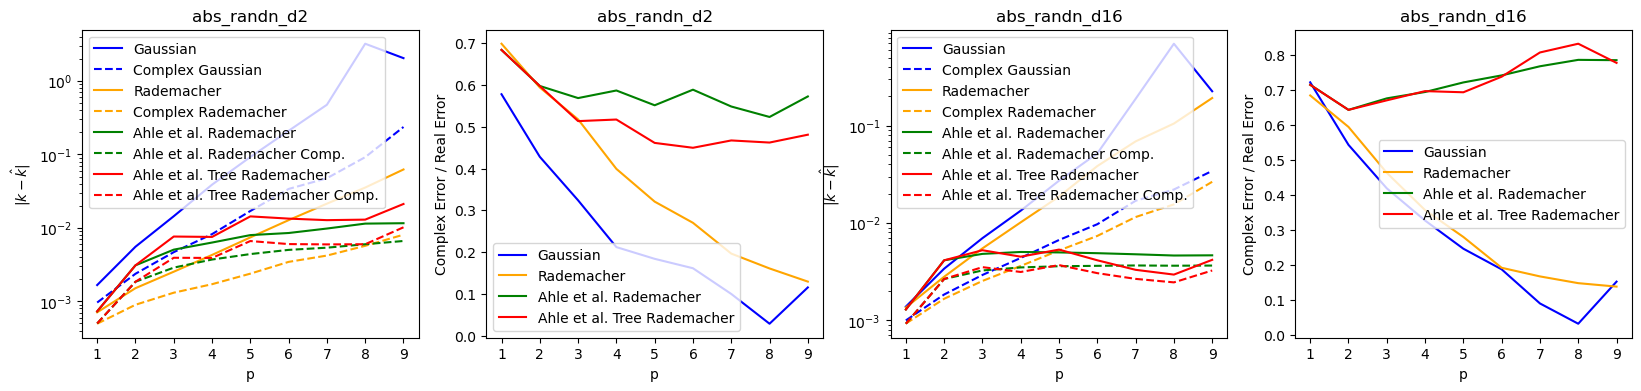

In [62]:
configs = [
    {'proj': 'gaussian', 'ahle': False, 'tree': False, 'color': 'blue'},
    {'proj': 'rademacher', 'ahle': False, 'tree': False, 'color': 'orange'},
    {'proj': 'rademacher', 'ahle': True, 'tree': False, 'color': 'green'},
    {'proj': 'rademacher', 'ahle': True, 'tree': True, 'color': 'red'},
]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

settings = ['abs_randn_d2', 'abs_randn_d16']

for setting in settings:
    df = pd.read_csv(f'../csv/error_over_p/{setting}_D1024_reps1000.csv')
    offset = 2 if setting == settings[1] else 0
    
    for config in configs:
        sub_df = df.loc[(df['proj']==config['proj']) & (df['ahle']==config['ahle']) & (df['tree']==config['tree'])]

        # real
        real_df = sub_df[sub_df['complex_weights'] == False]
        complex_df = sub_df[sub_df['complex_weights'] == True]

        ax[offset+0].plot(real_df['p'], real_df['mse'], label=real_df['name'].iloc[0], color=config['color'])
        ax[offset+0].plot(complex_df['p'], complex_df['mse'], label=complex_df['name'].iloc[0], color=config['color'], linestyle='dashed')
        ax[offset+1].plot(real_df['p'], complex_df['mse'].values / real_df['mse'].values, label=real_df['name'].iloc[0], color=config['color'])
    ax[offset+0].set_yscale('log')
    ax[offset+0].set_xticks(np.arange(1,10))
    ax[offset+0].legend()
    ax[offset+0].set_xlabel('p')
    ax[offset+0].set_ylabel(r'$|k - \hat{k}|$')
    ax[offset+0].set_title(setting)
    ax[offset+1].set_xticks(np.arange(1,10))
    ax[offset+1].legend()
    ax[offset+1].set_xlabel('p')
    ax[offset+1].set_ylabel('Complex Error / Real Error')
    ax[offset+1].set_title(setting)

plt.show()

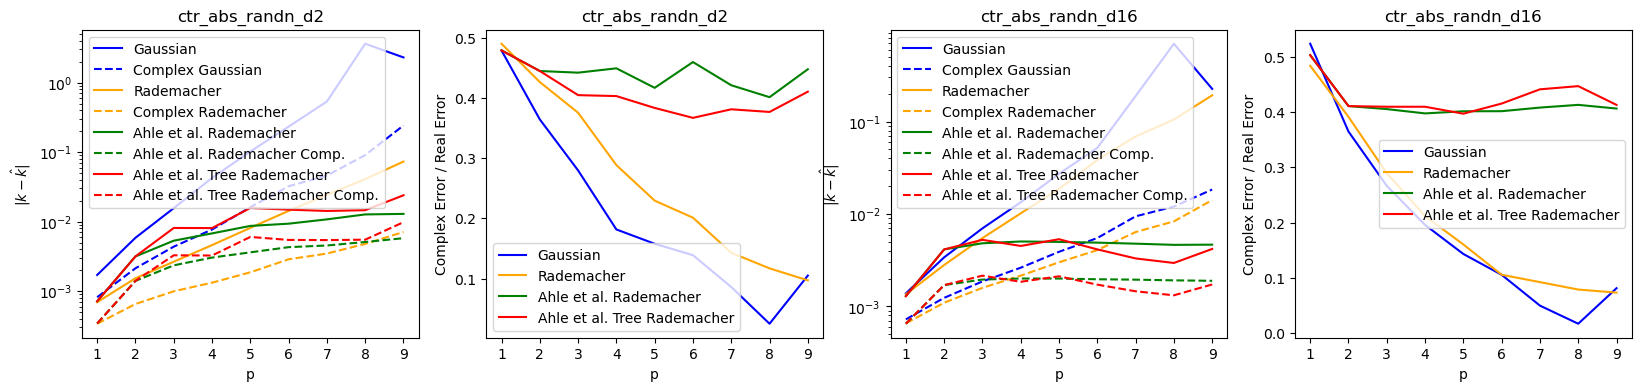

In [61]:
configs = [
    {'proj': 'gaussian', 'ahle': False, 'tree': False, 'color': 'blue'},
    {'proj': 'rademacher', 'ahle': False, 'tree': False, 'color': 'orange'},
    {'proj': 'rademacher', 'ahle': True, 'tree': False, 'color': 'green'},
    {'proj': 'rademacher', 'ahle': True, 'tree': True, 'color': 'red'},
]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

settings = ['ctr_abs_randn_d2', 'ctr_abs_randn_d16']

for setting in settings:
    df = pd.read_csv(f'../csv/error_over_p/{setting}_D1024_reps1000.csv')
    offset = 2 if setting == settings[1] else 0
    
    for config in configs:
        sub_df = df.loc[(df['proj']==config['proj']) & (df['ahle']==config['ahle']) & (df['tree']==config['tree'])]

        # real
        real_df = sub_df[sub_df['complex_weights'] == False]
        complex_df = sub_df[sub_df['complex_weights'] == True]

        ax[offset+0].plot(real_df['p'], real_df['mse'], label=real_df['name'].iloc[0], color=config['color'])
        ax[offset+0].plot(complex_df['p'], complex_df['mse'], label=complex_df['name'].iloc[0], color=config['color'], linestyle='dashed')
        ax[offset+1].plot(real_df['p'], complex_df['mse'].values / real_df['mse'].values, label=real_df['name'].iloc[0], color=config['color'])
    ax[offset+0].set_yscale('log')
    ax[offset+0].set_xticks(np.arange(1,10))
    ax[offset+0].legend()
    ax[offset+0].set_xlabel('p')
    ax[offset+0].set_ylabel(r'$|k - \hat{k}|$')
    ax[offset+0].set_title(setting)
    ax[offset+1].set_xticks(np.arange(1,10))
    ax[offset+1].legend()
    ax[offset+1].set_xlabel('p')
    ax[offset+1].set_ylabel('Complex Error / Real Error')
    ax[offset+1].set_title(setting)

plt.show()